<h1><strong><u>Digits Clustering</u></strong></h1>

In [3]:
pip install permetrics

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, pair_confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, make_scorer, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split, validation_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
import matplotlib.ticker as plticker
import torch
from torchmetrics.clustering import DunnIndex
from permetrics import ClusteringMetric


<h2><strong><u>Data Preparation</u></strong></h2>

In [5]:
data = load_digits(as_frame=True)
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [6]:
X = data.data
y = data.target
display(X.head())
display(y.head())

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int64

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [9]:
print(y.info())
print(y.unique())

<class 'pandas.core.series.Series'>
RangeIndex: 1797 entries, 0 to 1796
Series name: target
Non-Null Count  Dtype
--------------  -----
1797 non-null   int64
dtypes: int64(1)
memory usage: 14.2 KB
None
[0 1 2 3 4 5 6 7 8 9]


In [10]:
#Display message counts
# zeros = y[(y == 0)]
# ones = y[(y == 1)]
# twos = y[(y == 2)]
# threes = y[(y == 3)]
# fours = y[(y == 4)]
# fives = y[(y == 5)]
# sixes = y[(y == 6)]
# sevens = y[(y == 7)]
# eights = y[(y == 8)]
# nines = y[(y == 9)]
# zeros_count = zeros.value_counts().sum()
# ones_count = ones.value_counts().sum()
# twos_count = twos.value_counts().sum()
# ones_count = ones.value_counts().sum()
# zeros_count = zeros.value_counts().sum()
# ones_count = ones.value_counts().sum()
# zeros_count = zeros.value_counts().sum()
# ones_count = ones.value_counts().sum()
# zeros_count = zeros.value_counts().sum()
# ones_count = ones.value_counts().sum()
# total_messages = zeros_count + ones_count
# spam_fraction = ones_count / total_messages

# print("Number of ham messages: ", zeros_count)
# print("Number of spam messages: ", ones_count)
# print("Fraction of spam messages: {:.2f}%".format(spam_fraction * 100))

total_number = len(y)
print(total_number)
for i in range(0,10):
    number = y[y == i]
    count = number.value_counts().sum()
    number_fraction = count / total_number
    print(f"Number of {i}'s: ", count)
    print(f"Fraction of {i}'s: ", "{:.2f}%".format(number_fraction * 100))

1797
Number of 0's:  178
Fraction of 0's:  9.91%
Number of 1's:  182
Fraction of 1's:  10.13%
Number of 2's:  177
Fraction of 2's:  9.85%
Number of 3's:  183
Fraction of 3's:  10.18%
Number of 4's:  181
Fraction of 4's:  10.07%
Number of 5's:  182
Fraction of 5's:  10.13%
Number of 6's:  181
Fraction of 6's:  10.07%
Number of 7's:  179
Fraction of 7's:  9.96%
Number of 8's:  174
Fraction of 8's:  9.68%
Number of 9's:  180
Fraction of 9's:  10.02%


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
display(X_train.shape) 
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(1347, 64)

(450, 64)

(1347,)

(450,)

<h2><strong><u>K-Means Model Selection</u></strong></h2>

<h3><strong><u>Internal Clustering Metrics</u></strong></h3>

In [40]:
wss_values = []
sil_values = []
dbi_values = []
chi_values = []
dunn_values = []

maximum = 13
wsse_range = range(1,maximum)
sil_range = range(2,maximum)

for k in wsse_range:
    clusters = KMeans(n_clusters=k, random_state=0).fit(X_train)
    labels = clusters.predict(X_train)
    cm = ClusteringMetric(X=X_train, y_pred=labels)
    wss_values.append(clusters.inertia_)
    if k > 1: 
        sil_values.append(silhouette_score(X_train, clusters.labels_))
        dbi_values.append(davies_bouldin_score(X_train, labels))
        chi_values.append(calinski_harabasz_score(X_train, labels))
        dunn_values.append(cm.dunn_index())

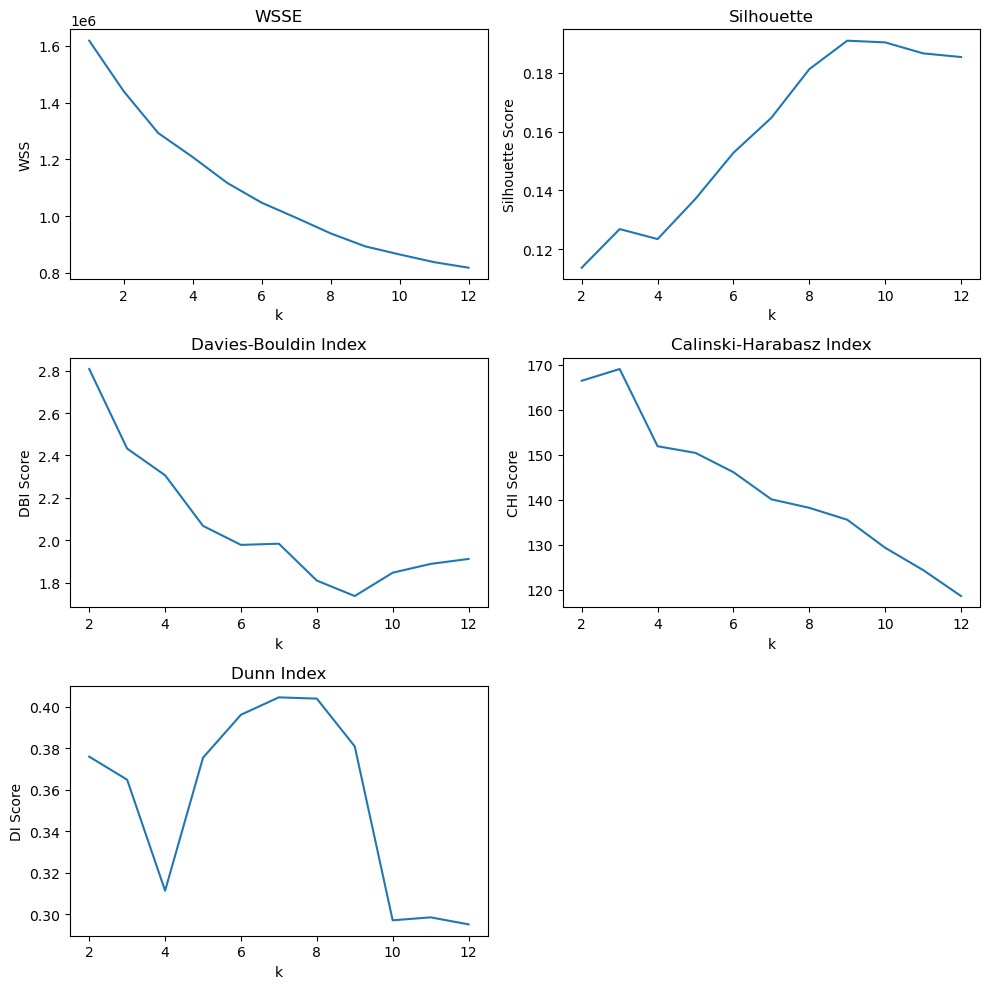

In [41]:
plot_dict = {"WSSE": [[wsse_range, wss_values], ["k", "WSS"]],
            "Silhouette": [[sil_range, sil_values], ["k", "Silhouette Score"]],
            "Davies-Bouldin Index": [[sil_range, dbi_values], ["k", "DBI Score"]],
            "Calinski-Harabasz Index": [[sil_range, chi_values], ["k", "CHI Score"]],
            "Dunn Index": [[sil_range, dunn_values], ["k", "DI Score"]]}

# Create an even number of subplots (e.g., 3 rows, 2 columns for 5 plots)
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in plot_dict.items():
    axs[count].plot(value[0][0], value[0][1])
    axs[count].set_xlabel(value[1][0])
    axs[count].set_ylabel(value[1][1])
    axs[count].set_title(key)
    count += 1

# Delete the unused subplot (e.g., the last one for a 3x2 grid with 5 plots)
fig.delaxes(axs[5]) 

plt.tight_layout()
plt.show()

In [12]:
sil_values.index(max(sil_values))

9

<h3><strong><u>Validation Curves</u></strong></h3>

In [31]:
validation_dict = {}
validation_metrics = {'adjusted_rand_score': ["Adjusted Rand Index", "ARI"],
                      'adjusted_mutual_info_score': ["Adjusted Mutual Information", "AMI"],
                      'homogeneity_score': ["Homogeneity Score", "Homogeneity"],
                      'completeness_score': ["Completeness Score", "Completeness"],
                      'v_measure_score': ["V-Measure Score", "V-Measure"]}

In [42]:
for key, value in validation_metrics.items():
    pipeline = Pipeline(
        [
            ("kmeans", KMeans(random_state=0))
        ]
    )
    clusters = list(range(1,30))

    train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring=key,
                                                    param_name="kmeans__n_clusters",
                                                    param_range=clusters,
                                                    verbose=1,
                                                    n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)

    validation_dict[f"KMeans Clusters: {value[0]}"] = [[clusters, train_scores_mean], [clusters, validation_scores_mean], ["k", value[1]]]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


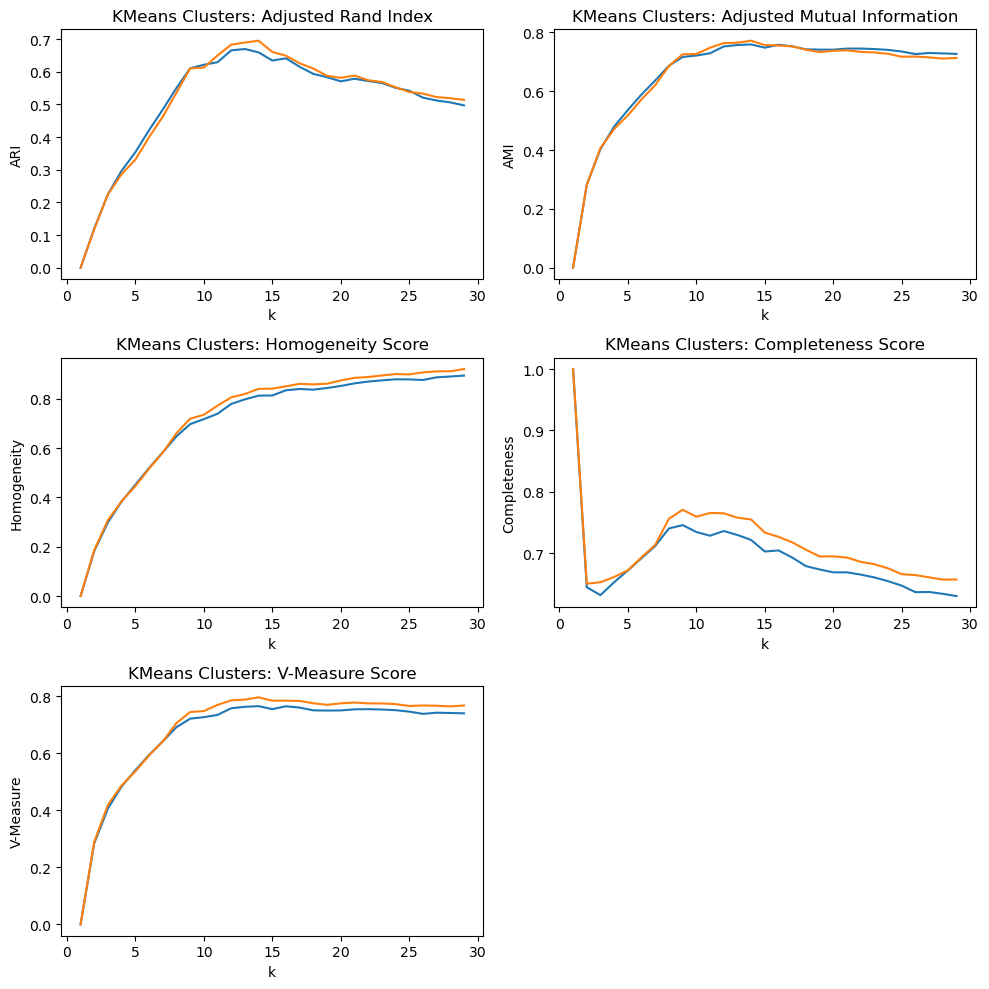

In [43]:
# Create an even number of subplots (e.g., 3 rows, 2 columns for 5 plots)
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in validation_dict.items():
    axs[count].plot(value[0][0], value[0][1])
    axs[count].plot(value[1][0], value[1][1])
    axs[count].set_xlabel(value[2][0])
    axs[count].set_ylabel(value[2][1])
    axs[count].set_title(key)
    count += 1

# Delete the unused subplot (e.g., the last one for a 3x2 grid with 5 plots)
fig.delaxes(axs[count]) 

plt.tight_layout()
plt.show()

<h3><strong><u>Next Steps</u></strong></h3>
Figure out right range of clusters to use in GridSearchCV; take that model to 'Model Evaluation' phase; see how classification metrics can be used for the model